In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Box-Constrained Quadratic Methods

A general quadratic optimization problem subject to linear constraints i.e., equality and inequality constraints, can be written as:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Gx \leq h \\ & Ax = b
    \end{aligned}
\end{equation}
$$

For what about its usage in machine learning i.e., for training support vector machines, we are interested in a special case of this problem where the inequality constraints are expressed as box-constraints:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Ax = b \\ & lb \leq x \leq ub
    \end{aligned}
\end{equation}
$$

In the support vector machine problem formulation, the equality vector $b$ and the lower bound $lb$ are vectors of all zeros.

In [5]:
from yase.optimization.box_constrained import *
from yase.optimization.utils import plot_trajectory_optimization

In [8]:
bcq = BoxConstrainedQuadratic()

## Projected Gradient

iter	cost		gnorm
   0	-6.3736e-03	1.0859e-02
   1	-2.1910e-02	2.8938e-04
   2	-2.3093e-02	2.0530e-05
   3	-2.3093e-02	0.0000e+00

[8.77952715 0.        ]


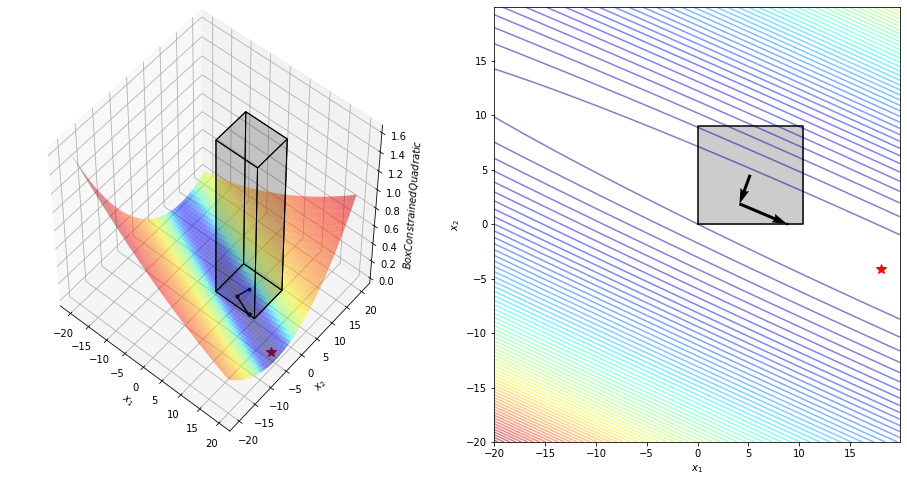

In [9]:
opt = ProjectedGradient(f=bcq, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(bcq, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Frank-Wolfe or Conditional Gradient

iter	cost		lb		gap
   0	-6.3736e-03	-7.2576e-02	6.6202e-02
  50	-2.3058e-02	-2.3100e-02	4.1357e-05
 100	-2.3074e-02	-2.3097e-02	2.2223e-05
 150	-2.3080e-02	-2.3095e-02	1.5245e-05
 200	-2.3083e-02	-2.3095e-02	1.1615e-05
 250	-2.3085e-02	-2.3095e-02	9.3857e-06
 300	-2.3086e-02	-2.3094e-02	7.8765e-06
 350	-2.3087e-02	-2.3094e-02	6.7866e-06
 400	-2.3088e-02	-2.3094e-02	5.9623e-06
 450	-2.3089e-02	-2.3094e-02	5.3169e-06
 500	-2.3089e-02	-2.3094e-02	4.7978e-06
 550	-2.3089e-02	-2.3094e-02	4.3713e-06
 600	-2.3090e-02	-2.3094e-02	4.0145e-06
 650	-2.3090e-02	-2.3094e-02	3.7116e-06
 700	-2.3090e-02	-2.3094e-02	3.4513e-06
 750	-2.3090e-02	-2.3094e-02	3.2252e-06
 800	-2.3091e-02	-2.3094e-02	3.0269e-06
 850	-2.3091e-02	-2.3094e-02	2.8516e-06
 900	-2.3091e-02	-2.3093e-02	2.6955e-06
 950	-2.3091e-02	-2.3093e-02	2.5557e-06
1000	-2.3091e-02	-2.3093e-02	2.4296e-06

[8.77226239e+00 4.16897169e-03]


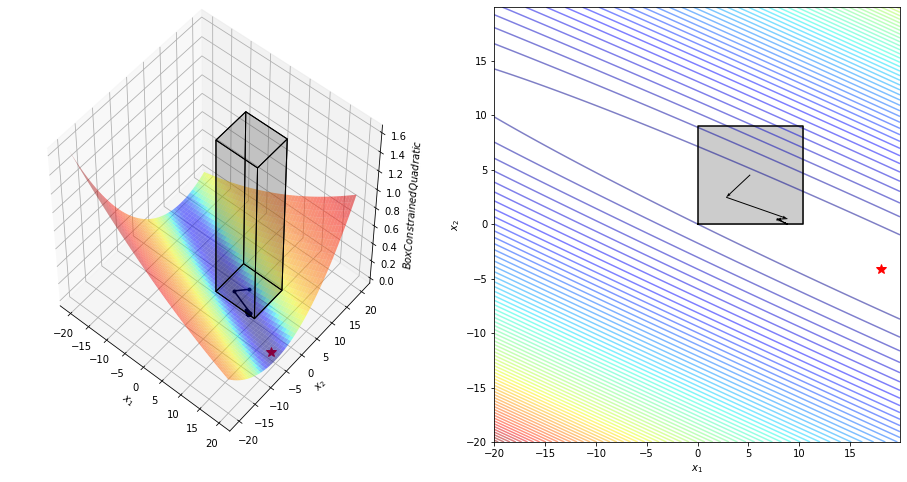

In [12]:
opt = FrankWolfe(f=bcq, verbose=50).minimize()
print(opt.x)
plot_trajectory_optimization(bcq, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Active Set

iter	cost		|B|	I/O
   0	-6.3736e-03	0	I 0+1
   1	-8.2207e-03	1	I 1+0
   2	-2.2366e-02	2	O 0(U)
   3	-2.2366e-02	1	

[10.33692154  0.        ]


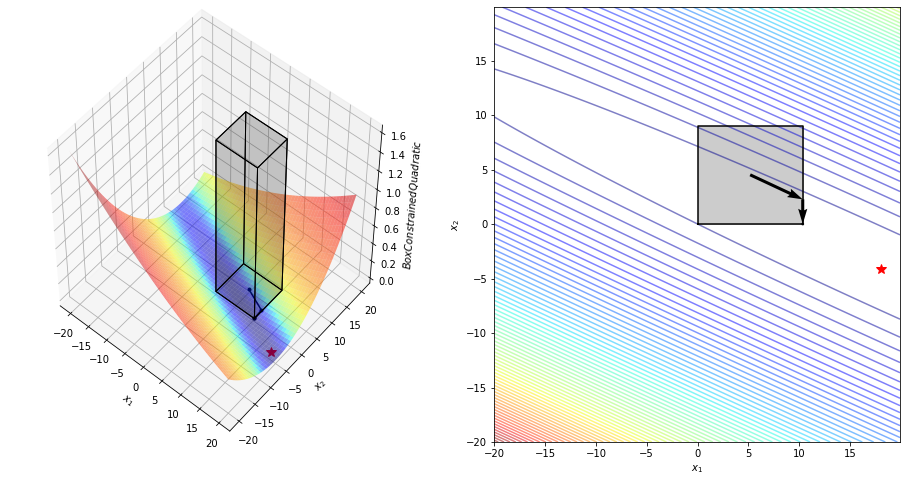

In [13]:
opt = ActiveSet(f=bcq, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(bcq, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Interior Point

iter	cost		p		gap
   0	-6.3736e-03	-7.2595e-02	6.6221e-02
   1	-2.1059e-02	-4.3888e-02	2.2829e-02
   2	-2.1851e-02	-2.6739e-02	4.8883e-03
   3	-2.2264e-02	-2.3776e-02	1.5113e-03
   4	-2.3023e-02	-2.3388e-02	3.6548e-04
   5	-2.3080e-02	-2.3145e-02	6.4890e-05
   6	-2.3091e-02	-2.3099e-02	7.7424e-06
   7	-2.3093e-02	-2.3094e-02	1.2982e-06
   8	-2.3093e-02	-2.3093e-02	1.5164e-07
   9	-2.3093e-02	-2.3093e-02	2.5394e-08
  10	-2.3093e-02	-2.3093e-02	2.9648e-09
  11	-2.3093e-02	-2.3093e-02	4.9650e-10
  12	-2.3093e-02	-2.3093e-02	5.7967e-11

[8.77952709e+00 2.69695506e-08]


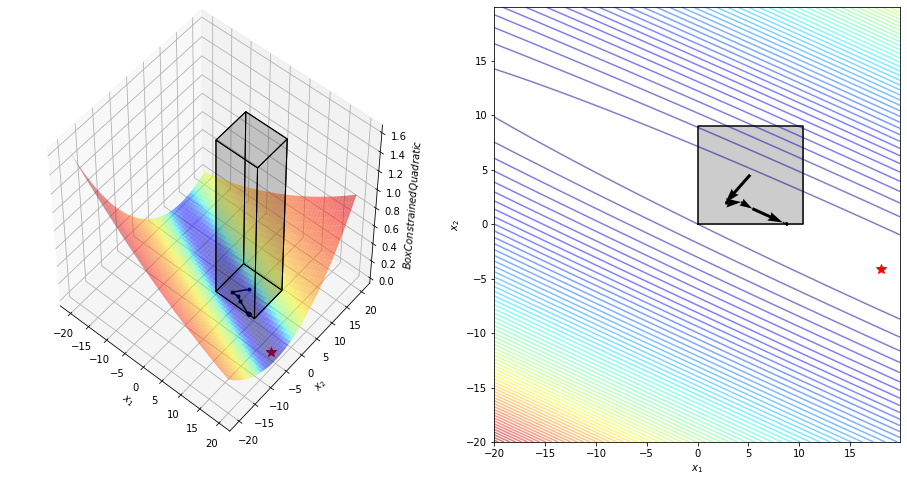

In [14]:
opt = InteriorPoint(f=bcq, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(bcq, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Lagrangian Dual Relaxation